In [34]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [49]:
data = pd.read_excel('FNCL 5.5.xlsx')
data=data.dropna(axis=0, how='any')
data.head() # sample of dataset

,Date,PX_LAST,PX_MID,FNCL 5.5,Unnamed: 4
1,2017-06-16,3.80,3.80,111.109375,2.27
2,2017-06-09,3.83,3.83,111.296875,2.22
3,2017-06-02,3.76,3.76,111.390625,2.20
4,2017-05-26,3.81,3.81,111.328125,2.22
5,2017-05-19,3.85,3.85,111.359375,2.21


In [98]:
def printFormular2(x,y,z,coef):
    order = len(coef)-1
    formula='y = '+str(coef[order])
    if order > 1:
        for n in np.arange(order-1,-1,-1):
            formula += (' + ' if coef[n]>0 else ' ') + str(coef[n])+'x^'+str(order-n)+' '
    print(formula)     
    print('R square is ',1-np.sum((z-y)**2)/np.sum((y-np.mean(y))**2))

y = 23.0908106699 + 58.5319375418x^1  -12.1651237696x^2  + 0.74831888465x^3 
R square is  0.9509321560489131


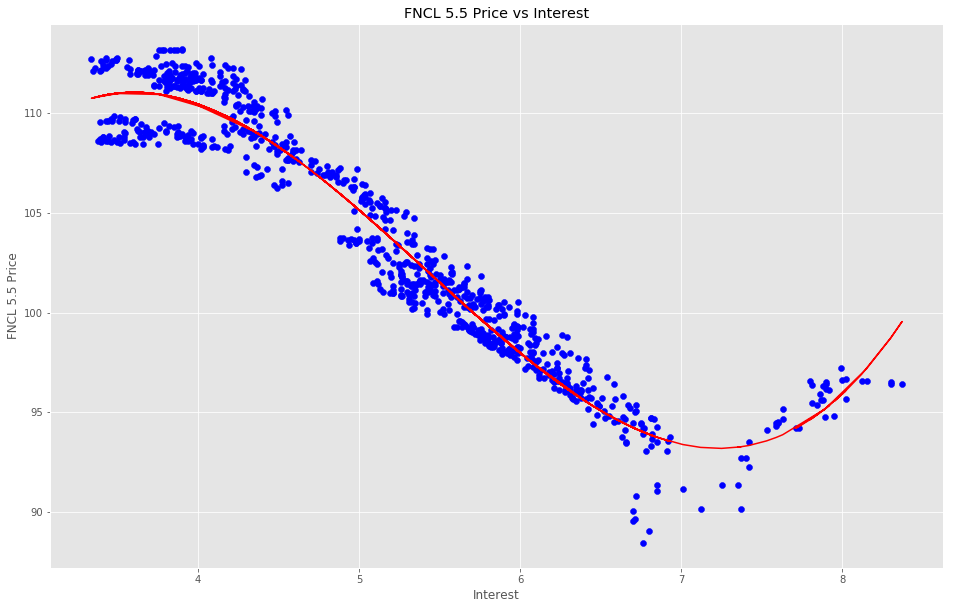

In [99]:
x=data['PX_MID']
y=data['FNCL 5.5']
coef = np.polyfit(x, y, 3)
z=coef[3]+x*coef[2]+x**2*coef[1]+x**3*coef[0]
plt.style.use('ggplot')
plt.figure(figsize=(16,10))
plt.subplot(1,1,1)
plt.scatter(x,y,color='b')
plt.plot(x,z,color='r')
plt.title('FNCL 5.5 Price vs Interest')
plt.xlabel('Interest')
plt.ylabel('FNCL 5.5 Price')
printFormular2(x,y,z,coef)